<a href="https://colab.research.google.com/github/Archa-B/Skin-Cancer-Detection_VGG-19/blob/main/SKIN_MP_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install efficientnet
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from keras.applications.efficientnet import EfficientNetB0 
from keras.applications.efficientnet import  preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

     |████████████████████████████████| 50 kB 6.6 MB/s 


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Colab Notebooks/data2/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/data2/test'

Working with 1749 images
Image examples: 
149.jpg


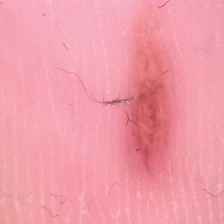

1504.jpg


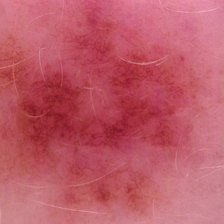

1497.jpg


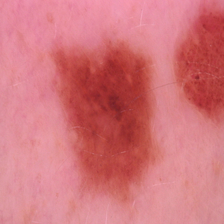

1476.jpg


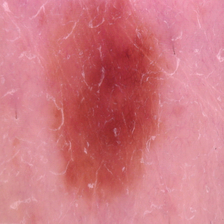

150.jpg


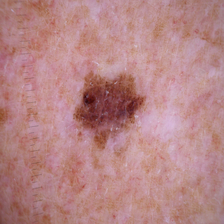

1490.jpg


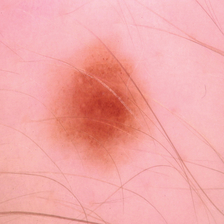

1482.jpg


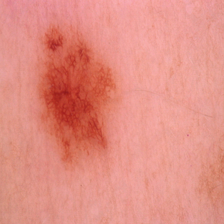

1487.jpg


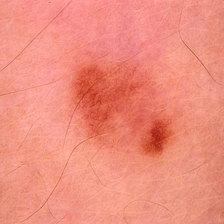

1489.jpg


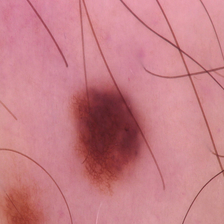

1475.jpg


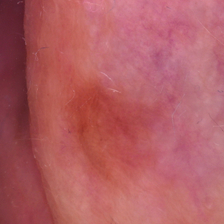

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))


In [ ]:
efficientnet= EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
efficientnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in efficientnet.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/data2/train/*')
print(len(folders))

2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    efficientnet = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 3195 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 102 images belonging to 2 classes.


In [ ]:
from datetime import datetime





start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=3,
  validation_steps=3,
  verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100


InvalidArgumentError: ignored

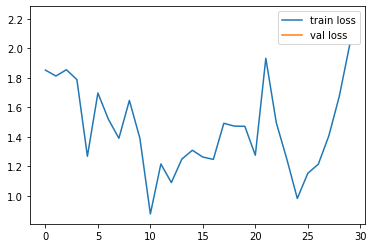

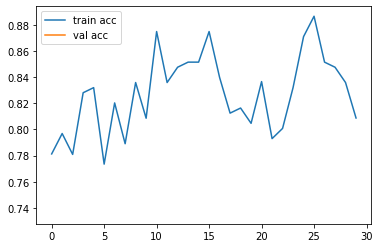

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('val_loss')

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Val_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/data2/test/malignant/1080.jpg',target_size=(224,224))
preprocessing_function=preprocess_input
i=image.img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape
pred=model.predict(input_arr)[0][0]
if pred==1:
  print("CANCEROUS")
else:
    print("NON-CANCEROUS")

NON-CANCEROUS


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.00000000e+00, 8.09618147e-15],
       [1.00000000e+00, 2.94031839e-15],
       [2.59480970e-07, 9.99999762e-01],
       [1.21425778e-01, 8.78574193e-01],
       [8.45449478e-20, 1.00000000e+00],
       [1.00000000e+00, 9.91000546e-11],
       [9.15944993e-01, 8.40549618e-02],
       [2.75806649e-08, 1.00000000e+00],
       [4.78032666e-14, 1.00000000e+00],
       [1.00000000e+00, 5.19981681e-17],
       [1.00000000e+00, 7.45630976e-36],
       [1.00000000e+00, 1.96200308e-14],
       [2.90226527e-02, 9.70977306e-01],
       [1.00000000e+00, 2.99119839e-27],
       [1.00000000e+00, 1.55919738e-24],
       [1.00000000e+00, 4.60773730e-22],
       [4.40715098e-07, 9.99999523e-01],
       [6.39388445e-13, 1.00000000e+00],
       [1.00000000e+00, 2.09838071e-21],
       [9.99998450e-01, 1.58340072e-06],
       [1.09201019e-05, 9.99989033e-01],
       [1.00000000e+00, 6.89259102e-14],
       [9.99541879e-01, 4.58118535e-04],
       [1.00000000e+00, 3.73996081e-14],
       [1.000000

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/data2/test/malignant/1080.jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[2., 0., 3.],
        [3., 1., 4.],
        [2., 0., 3.],
        ...,
        [4., 2., 5.],
        [3., 1., 4.],
        [3., 1., 4.]],

       [[3., 1., 4.],
        [3., 1., 4.],
        [5., 0., 4.],
        ...,
        [3., 1., 4.],
        [3., 1., 4.],
        [3., 1., 4.]],

       [[3., 1., 4.],
        [3., 1., 4.],
        [4., 2., 3.],
        ...,
        [3., 1., 4.],
        [3., 1., 4.],
        [3., 1., 4.]],

       ...,

       [[3., 1., 4.],
        [3., 1., 4.],
        [4., 2., 3.],
        ...,
        [3., 1., 4.],
        [2., 2., 4.],
        [3., 1., 2.]],

       [[3., 1., 2.],
        [3., 1., 4.],
        [4., 2., 3.],
        ...,
        [3., 1., 4.],
        [3., 1., 4.],
        [3., 1., 4.]],

       [[2., 2., 4.],
        [3., 1., 4.],
        [3., 1., 4.],
        ...,
        [3., 1., 4.],
        [5., 1., 2.],
        [3., 1., 4.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[7.587149e-13, 1.000000e+00]], dtype=float32)

In [ ]:
train_set.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
a=np.argmax(model.predict(img_data), axis=0)
a

array([0, 0])

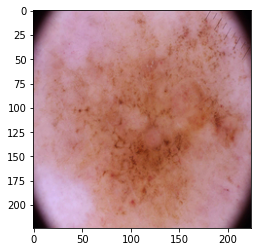

Cancerous


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
if(a==1):
    print("Non-Cancerous")
else:
    print("Cancerous")